# Assignment 3 - CNN

Class: COMP 5630 - Machine Learning

Author: Chris Hinkson

Email: cmh0201@auburn.edu

***

### Declaration of GenAI Usage

I formally recognize that I used ChatGPT in the following ways for this assignment:
- Exploring syntax across several modules. For instance, understanding what a function expects as input, or discovering cleaner syntax to accomplish a task with a given module.
- Generating examples for plotting data with matplotlib.
- Generating examples for making models with tensorflow/Keras.
- Discussing how Tensorflow / Keras models work "under-the-hood", such as when used with the Adam optimizer.
- Conceptually evaluating different strategies and solutions to problems encountered, such as how many layers to have and the tradeoffs of different epoch and batch sizes.

All code provided here is my own. However, my code may be based on a variety of sources, such as my own Python experience, tutorials available online, module documentation, and examples from ChatGPT.

***

### Notebook Table of Contents

1) [Project Report](#project-report)
2) [Project Imports and Configuration](#project-imports-and-configuration)
3) [Part 1: Dataset and Preprocessing](#part-1-dataset-and-preprocessing)
4) [Part 2: CNN](#part-2-cnn)
	1. [Model Building](#model-building)
	2. [Wide-Scope Model Testing](#wide-scope-model-testing)
	3. [RELU Learning Rate Investigation](#relu-learning-rate-investigation)
	4. [Activation Function Investigation](#activation-function-investigation)
	5. [Early Stopping Analysis](#early-stopping-analysis)

***

### Project Report

In this project, I create a Convolutional Neural Network (CNN) using Tensorflow and Keras. For the dataset, I download the UTK Face Cropped dataset from KaggleHub and split it into training and testing sets (and further split the training set into training and validation sets). I then perform a wide range of testing and tuning on the model to evaluate it under various conditions:

1. A wide-scope hyperparameter evaluation activity. This includes training/testing the model at various learning rates, using various activation functions, both with and without early stopping.
2. Learning rate variation, without early stopping, using RELU. This specifically evaluates the model's performance as a function of learning rate.
3. Activation function investigation while the learning rate is held stable. This specifically evaluates the model's performance across different activation functions.
4. Analysis of the model with and without early stopping across multiple patience levels. This allows for comparing how the model can perform with early stopping at each patience level and some of the tradeoffs of these different levels.

Overall, for the provided dataset, I found that **RELU** was the best activation function at a **learning rate of `0.001`** with **no early stopping**. However, as I explain below, this configuration of course comes with tradeoffs.

#### Discussion 1: Output Layer Activation Function

The activation function I chose for the output layer is a linear activation function. I chose this because the target, age, is a continuous variable. As such, the output layer needs to allow for a continous output in order to have accurate predictions. If the output were to be mapped or heavily translated, such as sigmoid which maps to [0,1], then further interpretation would be needed to obtain some kind of realistic predictions. Furthermore, the majority of these kinds of activation functions are not continuous, and although there is a maximum recorded age in the dataset, age is generally considered a continuous variable.

#### Discussion 2: Output Layer Neurons

The output layer has a single (1) neuron. Inline with the above question, since the output needs to be a single continuous variable, we need a single neuron to see the incoming layer and turn it into a singular output. Each neuron in the output layer will produce an output, and since we want a single output variable that is continuous, we only need one neuron.

#### Discussion 3: Overall Model Performance

As shown in the remainder of this notebook, there are a variety of metrics gathered across a variety of configurations. The below table highlights my findings for RELU, which I feel is the best activation function tested. See the [Wide-Scope Model Testing](#wide-scope-model-testing) output for metrics on other activation functions.

|   Learning Rate | Early Stopping   |   Average Validation Loss |   Average Validation MAE |   Final Test Loss |   Final Test MAE |   Epochs Ran |   Training Time (s) |
|-----------------|------------------|---------------------------|--------------------------|-------------------|------------------|--------------|---------------------|
|          0.1    | Yes              |                   443.215 |                  16.3313 |           395.493 |          15.1067 |            8 |              199.21 |
|          0.1    | No               |                   412.658 |                  15.5161 |           396.788 |          15.6664 |           10 |              236.03 |
|          0.01   | Yes              |                   398.093 |                  15.35   |           393.5   |          15.3367 |           10 |              239.3  |
|          0.01   | No               |                   397.01  |                  15.3533 |           396.789 |          15.0675 |           10 |              239.09 |
|          0.001  | Yes              |                   396.279 |                  15.2593 |           393.519 |          15.2918 |            5 |              133.38 |
|          0.001  | No               |                   396.12  |                  15.2894 |           393.491 |          15.3137 |           10 |              241.88 |
|          0.0001 | Yes              |                   451.458 |                  16.0154 |           393.514 |          15.2944 |           10 |              249.91 |
|          0.0001 | No               |                   453.785 |                  16.0488 |           393.561 |          15.2758 |           10 |              248.95 |
|          1e-05  | Yes              |                   858.393 |                  23.6756 |           758.368 |          21.997  |           10 |              248.17 |
|          1e-05  | No               |                   793.626 |                  22.5564 |           692.803 |          20.765  |           10 |              246.56 |

#### Discussion 4: Learning Rate Investigation

The learning rate clearly has a large effect on the model performance. To quantify this relationship, I tested the model's performance at a variety of learning rates with RELU and no early stopping. At high learning rates, the model's performance indicates that it did not properly learn (either learned too tightly or learned too loosely), and at low learning rates, the model's performance indicates that it did not learn enough to make good predictions.

The results of testing across learning rates with RELU:

![comp5630_assignment3_learningrateinvestigation.png](/Assignment3%20-%20CNN/media/comp5630_assignment3_learningrateinvestigation.png)

#### Discussion 5: Activation Function Investigation

The chosen activation function has clear effects on the model's performance. I decided to evaluate Sigmoid, RELU, and tanh activation functions in this project. From my investigation, I found that RELU has the best results, as I explain below.

##### Topic A: Update Rule Changes

No changes need to happen for the update rule given my activation functions. The Adam optimizer with Keras has an update rule that does not need to be changed for any of the activation functions. However, if I had implemented the CNN from scratch again, then the update rule may need to have been changed (or may have produced better results for a given activation function if it had been changed).

##### Topic B: Model Changes

The only difference, based on how I have implemented the model, between different activation functions is passing a parameter into my model builder function. This function then puts the passed parameter into the appropriate layers (all layers besides the output layer) to use as the activation function. So, in the end, I did not need to make any changes to achieve this experiment, besides iterating over the activation functions again.

##### Topic C: Learning Rate Findings

Overall, I found that a RELU activation function performed the best. While I tested this in a variety of ways throughout this project, in my [Activation Function Investigation](#activation-function-investigation) section, I present the below findings that show a large difference between RELU and the other activation functions at `lr = 0.001` and no early stopping:

| Activation Function   |   Final Validation Loss |   Test Loss |
|-----------------------|-------------------------|-------------|
| sigmoid               |                 396.304 |     393.846 |
| relu                  |                 165.551 |     163.286 |
| tanh                  |                 396.249 |     393.794 |

Additionally, when plotting the predictions vs real target values, it becomes clear that RELU was the only activation function to even somewhat represent a good relationship between predictions and actuals. Although still messy, the other activation functions clearly led to models that could not make good predictions and did not learn properly. Below are the plotted predictions vs actuals for each activation function:

![comp5630_assignment3_activationfunctions.png](/Assignment3%20-%20CNN/media/comp5630_assignment3_activationfunctions.png)

#### Discussion 6: Early Stopping Investigation

The final portion of this project looked into the effects of early stopping. To investigate this, I tested the model at various levels of patience with RELU and a learning rate of `0.001`. From my findings, shown below, I found that not using early stopping at all consistently provided a good result. While early stopping has the potential to both help the model (if the model were to overlearn after converging or starts delearning even) or hurt the model (if the model gets stopped early before it actually converges), it seems that, for this dataset and CNN architecture, early stopping overall hurts performance. However, it definitely helps on the efficiency of model training, which was a big challenge throughout this project.

##### Topic A: Loss Changes With Early Stopping

Early stopping appears to have a wide spread of results. Very low patience values of early stopping result in bad results, as do high values as well. Mid values appear to perform better, especially around a patience level of `3`, but the other patience levels are not consistent enough to decide a specific relationship.

##### Topic B: Overfit vs Underfit

As shown in the chart below, early stopping performs similar to what could be expected if the model learns really well and would be trained at different number of epochs. 

For instance, at a low early stopping rate, when we don't wait to confirm convergence, the model appears to be underfit. This makes sense intuitively, as if the model hasn't converged over enough epochs, then it wouldn't be fit well to the data. Likewise, for higher patience values, the model appears to overfit the data (or just converge but poorly). This also makes sense, as especially when holding the number of epochs constant, this approaches (and in the upper end, reaches) the same result as just letting more epochs run till convergence.

![comp5630_assignment3_earlystopping.png](/Assignment3%20-%20CNN/media/comp5630_assignment3_earlystopping.png)

##### Topic C: Model Performance With and Without Stopping Criteria

Overall, the model performs much better when used without early stopping. This is true for both validation and test sets. A close contender is early stopping with patience level `3`, although no early stopping appears to be a bit mroe consistent from my findings. It is worth noting that training the model takes a shorter period of time when using early stopping, which is a reasonable concern with large datasets and complex networks.

***

## Project Imports and Configuration

Some module imports and configurations are needed for this project. The below code cell loads all of the needed modules for both tasks in this assignment. While the individual task reports may identify how specific modules are used, a general description of the modules is as follows:

- Python's [os](https://docs.python.org/3/library/os.html) and [glob](https://docs.python.org/3/library/glob.html) are used for working with files and directories
- Python's [math](https://docs.python.org/3/library/math.html) is used for detecting NAN
- [tqdm](https://tqdm.github.io/) is used for nicer progress bar output
- Python's [time](https://docs.python.org/3/library/time.html) is used for tracking training times
- Python's [json](https://docs.python.org/3/library/json.html) is used for serializing data structures to save/load across program runs
- [tabulate](https://pypi.org/project/tabulate/) is used to neatly format and display tables
- [itertools](https://docs.python.org/3/library/itertools.html) is used to easily iterate over combinations of lists
- [KaggleHub](https://pypi.org/project/kagglehub/) is used for downloading the dataset.
- [numpy](https://numpy.org/) and [pandas](https://pandas.pydata.org/) are used for data storage
- [tensorflow](https://www.tensorflow.org/) is used for building the CNN model
- [matplotlib](https://matplotlib.org/) is used for plotting results
- [scikit-learn](https://scikit-learn.org/) is used for splitting the dataset into train/test sets

In [15]:
import os
import math
import glob
import tqdm
import time
import json
import tabulate
import itertools
import kagglehub
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Part 1: Dataset and Preprocessing

The below code cells will download and preprocess the dataset.

In [2]:
# Download the dataset from Kagglehub
downloadPath = kagglehub.dataset_download('moritzm00/utkface-cropped')
print(f"Dataset downloaded to: `{downloadPath}`!")

100%|██████████| 116M/116M [00:03<00:00, 33.1MB/s]

Extracting files...


Dataset downloaded to: `/root/.cache/kagglehub/datasets/moritzm00/utkface-cropped/versions/1`!


In [3]:
# Get all the image file paths
imagePaths = glob.glob(os.path.join(downloadPath, '*', '*.jpg'))

# Build dataframes for features and target
featuresDf = pd.DataFrame(columns=['path', 'filename', 'gender', 'race', 'date'])
targetDf = pd.DataFrame(columns=['age'])

# Iterate over file paths to extract features and target
incorrectFormats = []
for path in tqdm.tqdm(iterable=imagePaths, desc='Processing Images', unit='images'):
	try:

		# Split filename to get features and target
		fileName = os.path.basename(path)
		fileNameParts = fileName.split('_')

		if len(fileNameParts) != 4:
			incorrectFormats.append(path)
			continue

		# Decompose filename parts
		age = int(fileNameParts[0])
		gender = int(fileNameParts[1])
		race = int(fileNameParts[2])
		date = str(fileNameParts[3].split('.')[0])

		# Add to df
		featuresDf = pd.concat([featuresDf, pd.DataFrame({'path': [path], 'filename': [fileName], 'gender': [gender], 'race': [race], 'date': [date]})], ignore_index=True)
		targetDf = pd.concat([targetDf, pd.DataFrame({'age': [age]})], ignore_index=True)

	# Catch exception files, print error, and skip
	except Exception as e:
		print(f"Error processing file `{path}`! \nException: {e}")
		continue

Processing Images: 100%|██████████| 23708/23708 [00:33<00:00, 712.87images/s]


In [4]:
# Print dataset info for verification
print(f"Dataset processed successfully!")
print(f"-> Features DataFrame Shape: {featuresDf.shape}")
print(f"-> Target DataFrame Shape: {targetDf.shape}")

print(f"\nIncorrectly Formatted Files: {len(incorrectFormats)}")
if len(incorrectFormats) > 0:
	print(f"-> List of Incorrectly Formatted Files:")
	for incorrectFile in incorrectFormats:
		print(f"   - {incorrectFile}")

print(f"Target Distribution:")
print(targetDf['age'].describe())
print(targetDf['age'].value_counts().sort_index())

Dataset processed successfully!
-> Features DataFrame Shape: (23705, 5)
-> Target DataFrame Shape: (23705, 1)

Incorrectly Formatted Files: 3
-> List of Incorrectly Formatted Files:
   - /root/.cache/kagglehub/datasets/moritzm00/utkface-cropped/versions/1/UTKFace/61_1_20170109142408075.jpg.chip.jpg
   - /root/.cache/kagglehub/datasets/moritzm00/utkface-cropped/versions/1/UTKFace/61_1_20170109150557335.jpg.chip.jpg
   - /root/.cache/kagglehub/datasets/moritzm00/utkface-cropped/versions/1/UTKFace/39_1_20170116174525125.jpg.chip.jpg
Target Distribution:
count     23705
unique      104
top          26
freq       2197
Name: age, dtype: int64
age
1      1123
2       482
3       289
4       273
5       196
       ... 
105       5
110       5
111       1
115       3
116       4
Name: count, Length: 104, dtype: int64


In [5]:
# Drop any classes that have only one sample
ageCounts = targetDf['age'].value_counts()
agesToDrop = ageCounts[ageCounts == 1].index.tolist()
if len(agesToDrop) > 0:
	dropIndices = targetDf[targetDf['age'].isin(agesToDrop)].index
	featuresDf = featuresDf.drop(index=dropIndices).reset_index(drop=True)
	targetDf = targetDf.drop(index=dropIndices).reset_index(drop=True)
	print(f"Dropped {len(agesToDrop)} ages with only one sample each!")
	print(f"Ages Dropped: {agesToDrop}")

Dropped 2 ages with only one sample each!
Ages Dropped: [103, 111]


In [6]:
# Load images with keras into np arrays
images = np.empty(featuresDf.shape[0], dtype=object)
for i, path in tqdm.tqdm(enumerate(featuresDf['path']), desc='Loading Images', unit='images'):
	img = tf.keras.utils.load_img(path, target_size=(200, 200))
	imgArray = tf.keras.utils.img_to_array(img) / 255.0
	images[i] = imgArray
targets = targetDf['age'].to_numpy(dtype=np.float32)

Loading Images: 23703images [00:17, 1349.85images/s]


In [7]:
# Split into train and test sets
imagesTrain, imagesTest, targetsTrain, targetsTest = train_test_split(
	images,
	targets,
	test_size=0.2,
	stratify=targets,
	random_state=15
)
print(f"Train-Test Split Completed!")

# Split training into train and validation sets
imagesTrain, imagesVal, targetsTrain, targetsVal = train_test_split(
	imagesTrain,
	targetsTrain,
	test_size=0.20,
	stratify=targetsTrain,
	random_state=15
)
print(f"Train-Validation Split Completed!")

# Clear out the old image list now that its split to save mem
images = None

Train-Test Split Completed!
Train-Validation Split Completed!


## Part 2: CNN

This section is composed of several sub-sections that will be used to address various parts of the proposed questions.

### Model Building

The below code cells will provide utilities for building and hypertuning models.

In [8]:
# Build a simple CNN model
def modelBuilder(activationFunction: str='relu', learningRate: float=0.001):
	model = tf.keras.models.Sequential([

		# Input layer
		tf.keras.layers.Input(shape=(200, 200, 3)),

		# First conv layer - 32 filters, 3x3 kernels, RELU activation
		tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activationFunction),
		tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

		# Second conv layer - 64 filters, 3x3 kernels, RELU activation
		tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activationFunction),
		tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

		# Third conv layer - 128 filters, 3x3 kernels, RELU activation
		tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=activationFunction),
		tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

		# Dense layer
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(units=256, activation=activationFunction),

		# Dropout layer
		tf.keras.layers.Dropout(rate=0.5),

		# Output layer
		tf.keras.layers.Dense(units=1, activation='linear')
	])

	modelOptimizer = tf.keras.optimizers.Adam(learning_rate=learningRate)
	model.compile(optimizer=modelOptimizer, loss='mean_squared_error', metrics=['mae'])
	return model

In [9]:
# Create a early stopping callback
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(
	monitor='val_loss',
	patience=3,
	restore_best_weights=True
)

### Wide-Scope Model Testing

The below code cells will test the model for performance on a wide variety of hyperparameters (learning rate, activation function, and early stopping mode). It will present some of these results in tables which can then be used to influence the following sub-sections which analyze the hyperparameters further.

In [ ]:
# Define hyperparameters to tune with
learningRates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
activations = ['sigmoid', 'relu', 'tanh']
earlyStoppings = ["doEarlyStopping", "noEarlyStopping"]

# Build a matrix for storing all results across all combinations
modelResults = {
	f'{learningRate}': {
		activation: {
			earlyStopping: {}
			for earlyStopping in earlyStoppings
		}
		for activation in activations
	}
	for learningRate in learningRates

}

In [ ]:
# Load in any results we already have
with open("cnnResults.json", "r") as jsonFile:
  modelResults = json.load(fp=jsonFile)

In [ ]:
# Since colab likes to crash, make a list of what we have already gotten so we can resume
completedConfigs = [
	# NOTE THIS LIST IS DISABLED FOR TURN-IN BUT KEPT FOR FUTURE REFERENCE/USE
    # (0.1, 'sigmoid', 'doEarlyStopping'),
    # (0.1, 'sigmoid', 'noEarlyStopping'),
    # (0.1, 'relu', 'doEarlyStopping'),
    # (0.1, 'relu', 'noEarlyStopping'),
    # (0.1, 'tanh', 'doEarlyStopping'),
    # (0.1, 'tanh', 'noEarlyStopping'),
    # (0.01, 'sigmoid', 'doEarlyStopping'),
    # (0.01, 'sigmoid', 'noEarlyStopping'),
    # (0.01, 'relu', 'doEarlyStopping'),
    # (0.01, 'relu', 'noEarlyStopping'),
    # (0.01, 'tanh', 'doEarlyStopping'),
    # (0.01, 'tanh', 'noEarlyStopping'),
    # (0.001, 'sigmoid', 'doEarlyStopping'),
    # (0.001, 'sigmoid', 'noEarlyStopping'),
    # (0.001, 'relu', 'doEarlyStopping'),
    # (0.001, 'relu', 'noEarlyStopping'),
    # (0.001, 'tanh', 'doEarlyStopping'),
    # (0.001, 'tanh', 'noEarlyStopping'),
    # (0.0001, 'sigmoid', 'doEarlyStopping'),
    # (0.0001, 'sigmoid', 'noEarlyStopping'),
    # (0.0001, 'relu', 'doEarlyStopping')
]

In [ ]:
# Iterate over all possible combinations of hyperparameters and store results
for learningRate, activationFunction, earlyStopping in tqdm.tqdm(iterable=itertools.product(learningRates, activations, earlyStoppings), desc="Testing Combinations", unit="combination"):

	# Check if we have already done this this config
	if (learningRate, activationFunction, earlyStopping) in completedConfigs:
		print(f"The config ({learningRate}, {activationFunction}, {earlyStopping} has already been completed in a previous run! Continuing!)")
		time.sleep(0.01)
		continue

	# Build model using helpers
	model = modelBuilder(activationFunction=activationFunction, learningRate=learningRate)
	modelCallbacks = [earlyStoppingCallback] if earlyStopping == "doEarlyStopping" else []

	# Train the model
	trainingTimeStart = time.time()
	iterHistory = model.fit(
		x=np.stack(imagesTrain),
		y=targetsTrain,
		validation_data=(np.stack(imagesVal), targetsVal),
		epochs=10,
		batch_size=32,
		verbose=1,
		callbacks=modelCallbacks
	)
	trainingTimeEnd = time.time()
	trainingTimeTotal = trainingTimeEnd - trainingTimeStart

	# Get performance on validation and test sets
	validationLoss, validationMAE = model.evaluate(np.stack(imagesVal), targetsVal, verbose=0)
	testLoss, testMAE = model.evaluate(np.stack(imagesTest), targetsTest, verbose=0)

	# Add results of the config to results keeper
	modelResults[f'{learningRate}'][activationFunction][earlyStopping] = {
		"trainingLossAverage": np.mean(iterHistory.history['loss']),
		"validationLossAverage": np.mean(iterHistory.history['val_loss']),
		"validationLossFinal": validationLoss,
		"validationLossBest": np.min(iterHistory.history['val_loss']),
		"validationLossBestEpoch": int(np.argmin(iterHistory.history['val_loss'])) + 1,
		"validationMAEAverage": np.mean(iterHistory.history['val_mae']),
		"validationMAEFinal": validationMAE,
		"testLoss": testLoss,
		"testMAE": testMAE,
		"numEpochsRan": len(iterHistory.history['loss']),
		"trainingTime": trainingTimeTotal
	}

	# Save current progress of results to disk when done
	with open("cnnResults.json", "w") as jsonFile:
		json.dump(modelResults, jsonFile, indent=4)

Testing Combinations: 10combination [00:00, 98.70combination/s]

The config (0.1, sigmoid, doEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.1, sigmoid, noEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.1, relu, doEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.1, relu, noEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.1, tanh, doEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.1, tanh, noEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.01, sigmoid, doEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.01, sigmoid, noEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.01, relu, doEarlyStopping has already been completed in a previous run! Continuing!)
The config (0.01, relu, noEarlyStopping has already been completed in a previous run! Continuing!)
The 

Testing Combinations: 20combination [00:00, 98.07combination/s]

The config (0.0001, relu, doEarlyStopping has already been completed in a previous run! Continuing!)


Testing Combinations: 20combination [00:11, 98.07combination/s]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 482.6384 - mae: 16.8715 - val_loss: 221.9268 - val_mae: 11.1358
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 232.4093 - mae: 11.6701 - val_loss: 173.6240 - val_mae: 10.0154
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 192.6943 - mae: 10.5457 - val_loss: 187.8797 - val_mae: 10.0507
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 173.0055 - mae: 9.9215 - val_loss: 256.8431 - val_mae: 11.8926
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 179.9506 - mae: 10.0708 - val_loss: 167.5576 - val_mae: 10.1795
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 156.3652 - mae: 9.4377 - val_loss: 132.5272 - val_mae: 8.3861
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 144.6468 - mae: 9.0405 - val_loss: 126.1266 - val_mae: 8.2056
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 138.9599 - mae: 8.8441 - val_loss: 178.1206 - val_mae: 9.8177

Testing Combinations: 22combination [04:21, 18.79s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - loss: 536.6153 - mae: 17.3369 - val_loss: 418.8037 - val_mae: 14.9858
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 422.0747 - mae: 15.2389 - val_loss: 397.6602 - val_mae: 15.1390
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 400.1251 - mae: 15.2845 - val_loss: 395.9368 - val_mae: 15.3261
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 404.1981 - mae: 15.5359 - val_loss: 395.9645 - val_mae: 15.3113
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 397.7060 - mae: 15.3565 - val_loss: 395.9708 - val_mae: 15.3087
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 402.3227 - mae: 15.4405 - val_loss: 395.9740 - val_mae: 15.3076


Testing Combinations: 23combination [07:13, 33.13s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 571.5136 - mae: 18.1160 - val_loss: 429.6938 - val_mae: 15.0672
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 417.9191 - mae: 15.1416 - val_loss: 398.8724 - val_mae: 15.0998
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 406.7115 - mae: 15.3775 - val_loss: 396.1089 - val_mae: 15.2749
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 397.2168 - mae: 15.2983 - val_loss: 395.9532 - val_mae: 15.3165
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 409.5449 - mae: 15.5381 - val_loss: 395.9545 - val_mae: 15.3159
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 395.1258 - mae: 15.2658 - val_loss: 395.9254 - val_mae: 15.3393
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 411.2881 - mae: 15.6704 - val_loss: 395.9620 - val_mae: 15.3125
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 404.5517 - mae: 15.4664 - val_loss: 395.9947 - val_mae: 

Testing Combinations: 24combination [11:33, 59.80s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 993.4481 - mae: 25.8588 - val_loss: 963.4885 - val_mae: 25.3949
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 946.0164 - mae: 25.1406 - val_loss: 938.0463 - val_mae: 24.9946
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 950.1525 - mae: 25.1234 - val_loss: 913.5565 - val_mae: 24.6070
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 905.9072 - mae: 24.4544 - val_loss: 889.8404 - val_mae: 24.2233
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 899.4444 - mae: 24.2662 - val_loss: 866.9095 - val_mae: 23.8458
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 856.1954 - mae: 23.6480 - val_loss: 844.5602 - val_mae: 23.4702
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 841.0247 - mae: 23.3415 - val_loss: 822.8709 - val_mae: 23.1011
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 805.5598 - mae: 22.8869 - val_loss: 801.7864 - val_mae: 

Testing Combinations: 25combination [15:55, 88.74s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 944.8689 - mae: 25.0289 - val_loss: 901.2083 - val_mae: 24.4082
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 900.9124 - mae: 24.3682 - val_loss: 874.8398 - val_mae: 23.9774
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 852.6926 - mae: 23.6235 - val_loss: 849.5363 - val_mae: 23.5536
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 844.1880 - mae: 23.4538 - val_loss: 825.2286 - val_mae: 23.1416
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 826.2469 - mae: 23.1799 - val_loss: 801.7163 - val_mae: 22.7330
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 814.2251 - mae: 22.7803 - val_loss: 779.0355 - val_mae: 22.3302
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 778.8213 - mae: 22.3423 - val_loss: 757.2178 - val_mae: 21.9352
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 752.1547 - mae: 21.8625 - val_loss: 736.0006 - val_mae: 

Testing Combinations: 26combination [20:14, 117.85s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 809.0568 - mae: 22.5056 - val_loss: 414.9493 - val_mae: 15.5196
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 415.0278 - mae: 15.5807 - val_loss: 384.1451 - val_mae: 14.8027
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 398.9931 - mae: 15.2948 - val_loss: 349.2488 - val_mae: 14.1500
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 364.7113 - mae: 14.6477 - val_loss: 314.1496 - val_mae: 13.3560
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 310.9101 - mae: 13.5251 - val_loss: 282.0452 - val_mae: 12.7741
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 287.0934 - mae: 13.0513 - val_loss: 260.9529 - val_mae: 12.5218
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 273.9470 - mae: 12.7568 - val_loss: 245.5818 - val_mae: 12.0344
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 260.2116 - mae: 12.4256 - val_loss: 235.0397 - val_mae: 

Testing Combinations: 27combination [24:34, 145.57s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 740.4648 - mae: 21.2069 - val_loss: 420.4297 - val_mae: 15.6914
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 421.7438 - mae: 15.7515 - val_loss: 371.6203 - val_mae: 14.5024
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 373.4428 - mae: 14.8202 - val_loss: 319.5114 - val_mae: 13.5331
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 321.9555 - mae: 13.8440 - val_loss: 283.0063 - val_mae: 13.2223
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 285.0552 - mae: 13.0458 - val_loss: 245.5233 - val_mae: 11.9187
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 253.7736 - mae: 12.3017 - val_loss: 234.4683 - val_mae: 11.3794
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 242.2799 - mae: 11.8751 - val_loss: 221.8607 - val_mae: 11.7196
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 238.7780 - mae: 11.8008 - val_loss: 208.7980 - val_mae: 

Testing Combinations: 28combination [28:52, 170.26s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 691.3183 - mae: 20.4614 - val_loss: 568.6012 - val_mae: 18.1436
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 565.8821 - mae: 18.1598 - val_loss: 541.3326 - val_mae: 17.5120
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 532.9583 - mae: 17.3842 - val_loss: 517.6486 - val_mae: 16.9464
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 509.1689 - mae: 16.7661 - val_loss: 496.8348 - val_mae: 16.4354
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 492.5798 - mae: 16.3031 - val_loss: 478.7412 - val_mae: 15.9860
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 474.3921 - mae: 15.9334 - val_loss: 463.1176 - val_mae: 15.6147
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 469.0730 - mae: 15.8514 - val_loss: 449.6723 - val_mae: 15.3067
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 451.5491 - mae: 15.4132 - val_loss: 438.2700 - val_mae: 

Testing Combinations: 29combination [33:13, 191.68s/combination]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 618.6590 - mae: 19.0823 - val_loss: 526.9111 - val_mae: 17.1704
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 519.2662 - mae: 17.0807 - val_loss: 504.0444 - val_mae: 16.6126
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 498.9574 - mae: 16.5204 - val_loss: 484.6920 - val_mae: 16.1296
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 472.7780 - mae: 15.9609 - val_loss: 467.8126 - val_mae: 15.7263
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 472.0771 - mae: 15.9107 - val_loss: 453.3569 - val_mae: 15.3947
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 449.9427 - mae: 15.4664 - val_loss: 441.3536 - val_mae: 15.1999
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 445.1230 - mae: 15.4666 - val_loss: 431.2500 - val_mae: 15.0829
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 433.0571 - mae: 15.1545 - val_loss: 422.9335 - val_mae: 

Testing Combinations: 30combination [37:32, 75.08s/combination] 


In [ ]:
# Load in final results
with open("cnnResults.json", "r") as jsonFile:
  modelResults = json.load(fp=jsonFile)

In [ ]:
# Display all metrics in a table for an activation function
def displayResultsForActivationFunction(activationFunction: str):
	tableHeaders = ['Learning Rate', 'Early Stopping', 'Average Validation Loss', 'Average Validation MAE', "Final Test Loss", "Final Test MAE", "Epochs Ran", "Training Time (s)"]
	tableRows = []
	for learningRate, earlyStopping in itertools.product(learningRates, earlyStoppings):
		resultData = modelResults[f'{learningRate}']['sigmoid'][earlyStopping]
		tableRows.append([
			learningRate,
			"Yes" if earlyStopping == "doEarlyStopping" else "No",
			f"{resultData.get('validationLossAverage'):.4f}",
			f"{resultData.get('validationMAEAverage'):.4f}",
			f"{resultData.get('testLoss'):.4f}",
			f"{resultData.get('testMAE'):.4f}",
			f"{resultData.get('numEpochsRan')}",
			f"{resultData.get('trainingTime'):.2f}"
		])
	return tabulate.tabulate(tabular_data=tableRows, headers=tableHeaders, tablefmt='github')

# Go through all activation functions and display results
for activationFunction in activations:
	print(f"CNN Results for {activationFunction} Activation Function")
	print(displayResultsForActivationFunction(activationFunction))

CNN Results for sigmoid Activation Function
|   Learning Rate | Early Stopping   |   Average Validation Loss |   Average Validation MAE |   Final Test Loss |   Final Test MAE |   Epochs Ran |   Training Time (s) |
|-----------------|------------------|---------------------------|--------------------------|-------------------|------------------|--------------|---------------------|
|          0.1    | Yes              |                   443.215 |                  16.3313 |           395.493 |          15.1067 |            8 |              199.21 |
|          0.1    | No               |                   412.658 |                  15.5161 |           396.788 |          15.6664 |           10 |              236.03 |
|          0.01   | Yes              |                   398.093 |                  15.35   |           393.5   |          15.3367 |           10 |              239.3  |
|          0.01   | No               |                   397.01  |                  15.3533 |           39

In [ ]:
# Get the best learning rate for an activation function based on test MAE
def getBestLearningRateForActivationFunction(activationFunction: str):
	bestLearningRate = None
	bestEarlyStopping = None
	bestTestMAE = None
	for learningRate, earlyStopping in itertools.product(learningRates, earlyStoppings):
		resultData = modelResults[f'{learningRate}'][activationFunction][earlyStopping]
		testMAE = resultData.get('testMAE')
		if (bestTestMAE is None) or (testMAE is not None and testMAE < bestTestMAE):
			bestTestMAE = testMAE
			bestLearningRate = learningRate
			bestEarlyStopping = earlyStopping
	return bestLearningRate, bestEarlyStopping, bestTestMAE

# Display best learning rates for all activation functions
tableHeaders = ['Activation Function', 'Best Learning Rate', 'Early Stopping Used?', 'Achieved Test MAE']
tableRows = []
for activationFunction in activations:
	bestLearningRate, bestEarlyStopping, bestTestMAE = getBestLearningRateForActivationFunction(activationFunction)
	tableRows.append([
		activationFunction,
		bestLearningRate,
		"Yes" if bestEarlyStopping == "doEarlyStopping" else "No",
		bestTestMAE
	])
print("Best Learning Rates per Activation Function")
print(tabulate.tabulate(tabular_data=tableRows, headers=tableHeaders, tablefmt='github'))

Best Learning Rates per Activation Function
| Activation Function   |   Best Learning Rate | Early Stopping Used?   |   Achieved Test MAE |
|-----------------------|----------------------|------------------------|---------------------|
| sigmoid               |                0.01  | No                     |            15.0675  |
| relu                  |                0.001 | Yes                    |             7.34214 |
| tanh                  |                0.01  | No                     |            14.9499  |


### RELU Learning Rate Investigation

The below code cells will test the model for peformance at various learning rates when using RELU as the activation function without early stopping.

In [10]:
# Build list for LR and dict for results
reluAnalysis_learningRates = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
reluAnalysis_results = {
	f'{learningRate}': {}
	for learningRate in reluAnalysis_learningRates
}

In [11]:
# Iterative over LR's to try with RELU and no early stopping
for learningRate in tqdm.tqdm(iterable=reluAnalysis_learningRates, desc="RELU Learning Rate Analysis", unit="learning rate"):

	# Build model using same helpers as before
	model = modelBuilder(activationFunction='relu', learningRate=learningRate)

	# Train the model
	iterHistory = model.fit(
		x=np.stack(imagesTrain),
		y=targetsTrain,
		validation_data=(np.stack(imagesVal), targetsVal),
		epochs=10,
		batch_size=32,
		verbose=1
	)

	# Get performance on validation and test sets
	validationLoss, validationMAE = model.evaluate(np.stack(imagesVal), targetsVal, verbose=0)
	testLoss, testMAE = model.evaluate(np.stack(imagesTest), targetsTest, verbose=0)

	# Add results of the config to results keeper
	reluAnalysis_results[f'{learningRate}'] = {
		"trainingLossAverage": np.mean(iterHistory.history['loss']),
		"validationLossAverage": np.mean(iterHistory.history['val_loss']),
		"validationLossFinal": validationLoss,
		"validationLossBest": np.min(iterHistory.history['val_loss']),
		"validationLossBestEpoch": int(np.argmin(iterHistory.history['val_loss'])) + 1,
		"validationMAEAverage": np.mean(iterHistory.history['val_mae']),
		"validationMAEFinal": validationMAE,
		"testLoss": testLoss,
		"testMAE": testMAE,
	}

RELU Learning Rate Analysis:   0%|          | 0/7 [00:00<?, ?learning rate/s]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/10
475/475 ━━━━━━━━

RELU Learning Rate Analysis:  14%|█▍        | 1/7 [04:18<25:50, 258.42s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - loss: 841473085008773120.0000 - mae: 103655384.0000 - val_loss: 8996.7246 - val_mae: 92.7406
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 9129.7246 - mae: 88.1794 - val_loss: 6247.7124 - val_mae: 76.5030
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 6749.3994 - mae: 74.1391 - val_loss: 4644.1304 - val_mae: 65.2077
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 5313.1577 - mae: 65.1332 - val_loss: 3738.4329 - val_mae: 57.8826
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 4328.4067 - mae: 57.6440 - val_loss: 3199.5042 - val_mae: 53.0914
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 3974.9246 - mae: 54.8603 - val_loss: 2979.4155 - val_mae: 51.0317
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 3730.5420 - mae: 53.0911 - val_loss: 2729.5854 - val_mae: 48.6131
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 3412.4829 - mae: 50.4

RELU Learning Rate Analysis:  29%|██▊       | 2/7 [08:27<21:04, 252.90s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 30s 57ms/step - loss: 104018100224.0000 - mae: 41180.4805 - val_loss: 397.7793 - val_mae: 15.1347
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 433.0208 - mae: 16.0911 - val_loss: 398.7483 - val_mae: 15.1034
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 439.8857 - mae: 16.1412 - val_loss: 396.5005 - val_mae: 15.2241
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 442.7520 - mae: 16.2393 - val_loss: 401.0856 - val_mae: 15.0452
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 428.8725 - mae: 15.9639 - val_loss: 396.3837 - val_mae: 15.2366
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 433.7514 - mae: 16.0496 - val_loss: 406.6007 - val_mae: 14.9759
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 446.9634 - mae: 16.2283 - val_loss: 402.0010 - val_mae: 15.0312
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 447.3448 - mae: 16.2038 - val_loss: 396.2549

RELU Learning Rate Analysis:  43%|████▎     | 3/7 [12:38<16:47, 251.86s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - loss: 550301184.0000 - mae: 2612.9448 - val_loss: 1429.5902 - val_mae: 32.1646
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 1399.0948 - mae: 31.7830 - val_loss: 1301.0017 - val_mae: 30.3489
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 1247.8909 - mae: 29.5809 - val_loss: 1108.9008 - val_mae: 27.5994
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 1046.4816 - mae: 26.5895 - val_loss: 846.5275 - val_mae: 23.5032
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 800.2142 - mae: 22.4480 - val_loss: 585.9543 - val_mae: 18.5325
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 620.5688 - mae: 19.0525 - val_loss: 457.0742 - val_mae: 15.4804
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 551.7271 - mae: 18.1122 - val_loss: 422.9258 - val_mae: 15.0025
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 533.0933 - mae: 17.8662 - val_loss: 413.80

RELU Learning Rate Analysis:  57%|█████▋    | 4/7 [16:46<12:32, 250.68s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 20572.2812 - mae: 32.5159 - val_loss: 403.6504 - val_mae: 16.3424
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 420.5312 - mae: 15.8132 - val_loss: 330.8427 - val_mae: 14.3923
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 546.9972 - mae: 17.5337 - val_loss: 401.8042 - val_mae: 15.0334
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 442.3045 - mae: 16.1084 - val_loss: 427.8203 - val_mae: 16.9467
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 476.9161 - mae: 17.0131 - val_loss: 413.2834 - val_mae: 14.9663
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 457.4607 - mae: 16.4746 - val_loss: 405.5286 - val_mae: 16.0661
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 436.7614 - mae: 16.1798 - val_loss: 395.8839 - val_mae: 15.3467
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 421.6119 - mae: 15.8167 - val_loss: 398.7342 - val_mae

RELU Learning Rate Analysis:  71%|███████▏  | 5/7 [20:56<08:20, 250.33s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - loss: 905.9944 - mae: 19.4965 - val_loss: 291.3682 - val_mae: 13.2500
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 305.3417 - mae: 13.4902 - val_loss: 288.0134 - val_mae: 12.5924
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 266.4189 - mae: 12.4952 - val_loss: 184.9388 - val_mae: 10.0596
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 213.6629 - mae: 11.0710 - val_loss: 173.0299 - val_mae: 10.1054
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 193.2212 - mae: 10.5467 - val_loss: 147.7501 - val_mae: 9.2989
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 163.3195 - mae: 9.6402 - val_loss: 236.5054 - val_mae: 12.2119
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 202.9691 - mae: 10.6715 - val_loss: 129.0039 - val_mae: 8.3902
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 138.9831 - mae: 8.9046 - val_loss: 169.2434 - val_mae: 9.39

RELU Learning Rate Analysis:  86%|████████▌ | 6/7 [25:08<04:10, 250.87s/learning rate]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - loss: 470.3462 - mae: 16.5850 - val_loss: 223.1405 - val_mae: 10.9394
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 226.6216 - mae: 11.4160 - val_loss: 148.7623 - val_mae: 8.9924
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 173.2327 - mae: 9.9881 - val_loss: 165.9418 - val_mae: 9.3440
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 139.5453 - mae: 8.8735 - val_loss: 110.1436 - val_mae: 7.8498
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 125.0939 - mae: 8.3889 - val_loss: 105.7559 - val_mae: 7.5970
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 112.9673 - mae: 7.9865 - val_loss: 136.3511 - val_mae: 8.3504
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 103.6388 - mae: 7.6129 - val_loss: 109.3540 - val_mae: 7.5521
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 93.1497 - mae: 7.2243 - val_loss: 96.9324 - val_mae: 7.2668
Epoch 9

RELU Learning Rate Analysis: 100%|██████████| 7/7 [29:25<00:00, 252.26s/learning rate]


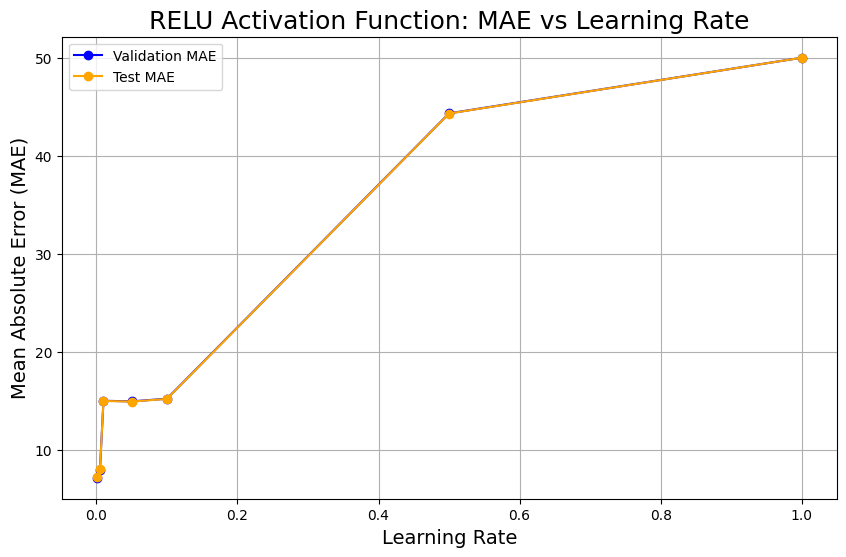

In [20]:
# Get lists of MAE for validation and test per LR
reluAnalysis_validationMAEPerLR = []
reluAnalysis_testMAEPerLR = []
for learningRate in reluAnalysis_learningRates:
	resultData = reluAnalysis_results[f'{learningRate}']
	validationMAE = resultData.get('validationMAEFinal')
	testMAE = resultData.get('testMAE')

	# Fix exploding MAE values
	if validationMAE is None or math.isnan(validationMAE):
		validationMAE = 50
	if testMAE is None or math.isnan(testMAE):
		testMAE = 50

	reluAnalysis_validationMAEPerLR.append(validationMAE)
	reluAnalysis_testMAEPerLR.append(testMAE)

# Make plot of results
plt.figure(figsize=(10, 6))
plt.title('RELU Activation Function: MAE vs Learning Rate', fontsize=18)
plt.plot(reluAnalysis_learningRates, reluAnalysis_validationMAEPerLR, marker='o', color="blue", label='Validation MAE')
plt.plot(reluAnalysis_learningRates, reluAnalysis_testMAEPerLR, marker='o', color="orange", label='Test MAE')
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Activation Function Investigation

The below code cells will test the model for peformance with various activation functions at a constant learning rate (`0.001`, based on results obtained earlier in this project). It will try three different learning rates (sigmoid, relu, and tanh), obtain the final loss for each, and then plot the true labels vs predictions.

In [21]:
# Build list for activation functions and dict for results
activationAnalysis_activationFunctions = ['sigmoid', 'relu', 'tanh']
activationAnalysis_Results = {
	activationFunction: {}
	for activationFunction in activationAnalysis_activationFunctions
}

In [33]:
# Iterative over activation functions with no early stopping at LR=0.001
for activationFunction in tqdm.tqdm(iterable=activationAnalysis_activationFunctions, desc="Activation Function Analysis", unit="activation function"):

  # Build model using same helpers as before
  model = modelBuilder(activationFunction=activationFunction, learningRate=0.001)

  # Train the model
  iterHistory = model.fit(
    x=np.stack(imagesTrain),
    y=targetsTrain,
    validation_data=(np.stack(imagesVal), targetsVal),
    epochs=10,
    batch_size=32,
    verbose=1
  )

  # Get predictions on test set
  testPredictions = model.predict(np.stack(imagesTest))

  # Get performance on validation and test sets
  validationLoss, validationMAE = model.evaluate(np.stack(imagesVal), targetsVal, verbose=0)
  testLoss, testMAE = model.evaluate(np.stack(imagesTest), targetsTest, verbose=0)

  # Add results of the config to results keeper
  activationAnalysis_Results[f'{activationFunction}'] = {
    "validationLossFinal": validationLoss,
    "testLoss": testLoss,
    "testPredictions": testPredictions
  }

Activation Function Analysis:   0%|          | 0/3 [00:00<?, ?activation function/s]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 616.1959 - mae: 19.1421 - val_loss: 396.1608 - val_mae: 15.2662
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 406.2759 - mae: 15.4437 - val_loss: 396.0307 - val_mae: 15.3989
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 399.3935 - mae: 15.3581 - val_loss: 396.0260 - val_mae: 15.2920
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 405.5653 - mae: 15.5111 - val_loss: 396.0050 - val_mae: 15.3919
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 403.0754 - mae: 15.4895 - val_loss: 395.9259 - val_mae: 15.3505
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 402.6265 - mae: 15.5158 - val_loss: 395.9570 - val_mae: 15.3148
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 403.8652 - mae: 15.4930 - val_loss: 395.9530 - val_mae: 15.3727
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 408.2462 - mae: 15.6702 - val_loss: 395.9808 - val_mae: 

Activation Function Analysis:  33%|███▎      | 1/3 [04:26<08:52, 266.43s/activation function]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 507.1024 - mae: 16.9726 - val_loss: 182.7329 - val_mae: 10.0302
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 198.1386 - mae: 10.6551 - val_loss: 137.8826 - val_mae: 8.9978
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 155.8688 - mae: 9.5139 - val_loss: 149.2514 - val_mae: 9.5922
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 144.0337 - mae: 9.0730 - val_loss: 113.2847 - val_mae: 8.0375
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 117.2433 - mae: 8.1641 - val_loss: 128.2990 - val_mae: 8.8251
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 110.4175 - mae: 8.0035 - val_loss: 102.0392 - val_mae: 7.4112
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 95.4469 - mae: 7.3748 - val_loss: 94.1509 - val_mae: 7.1019
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 87.7850 - mae: 7.1479 - val_loss: 97.2448 - val_mae: 7.2341
Epoch 9/1

Activation Function Analysis:  67%|██████▋   | 2/3 [08:50<04:25, 265.23s/activation function]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 428.0144 - mae: 15.7813 - val_loss: 395.9846 - val_mae: 15.3854
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 392.5891 - mae: 15.2251 - val_loss: 395.9273 - val_mae: 15.3360
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 405.2926 - mae: 15.5053 - val_loss: 395.9267 - val_mae: 15.3525
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 409.0571 - mae: 15.5974 - val_loss: 396.0235 - val_mae: 15.2926
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 395.0796 - mae: 15.3887 - val_loss: 396.8268 - val_mae: 15.1946
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 404.6529 - mae: 15.5213 - val_loss: 396.3238 - val_mae: 15.2437
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 405.3570 - mae: 15.4706 - val_loss: 396.0231 - val_mae: 15.2927
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 392.8823 - mae: 15.2919 - val_loss: 396.2003 - val_mae: 

Activation Function Analysis: 100%|██████████| 3/3 [13:17<00:00, 265.68s/activation function]


In [34]:
# Make a table for reporting final validation loss and test loss
tableHeaders = ['Activation Function', 'Final Validation Loss', 'Test Loss']
tableRows = []
for activationFunction in activationAnalysis_activationFunctions:
  resultData = activationAnalysis_Results[activationFunction]
  tableRows.append([
    activationFunction,
    resultData.get('validationLossFinal'),
    resultData.get('testLoss')
  ])
print(f"Final Validation and Test Loss Across Activation Functions At LR=0.01")
print(tabulate.tabulate(tabular_data=tableRows, headers=tableHeaders, tablefmt='github'))

Final Validation and Test Loss Across Activation Functions At LR=0.01
| Activation Function   |   Final Validation Loss |   Test Loss |
|-----------------------|-------------------------|-------------|
| sigmoid               |                 396.304 |     393.846 |
| relu                  |                 165.551 |     163.286 |
| tanh                  |                 396.249 |     393.794 |


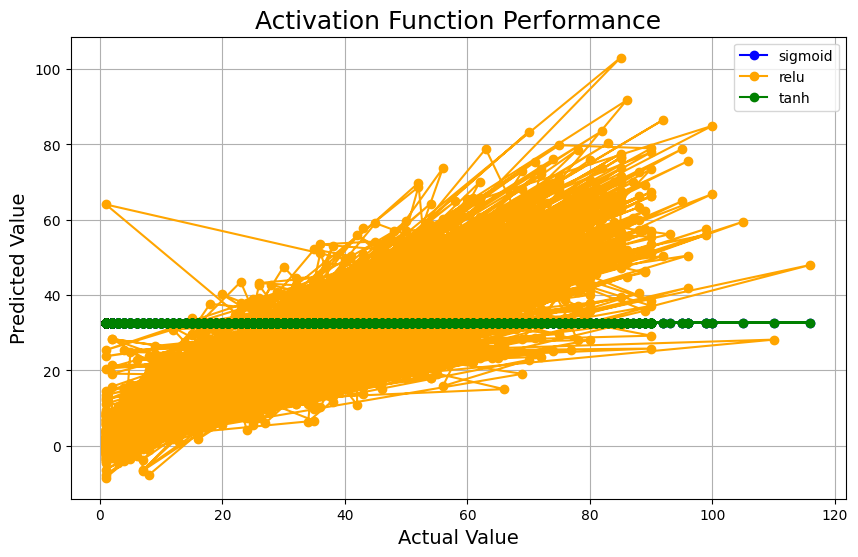

In [35]:
# Plot true labels vs predicted labels for each activation function
plt.figure(figsize=(10, 6))

activationFunctionColors = ['blue', 'orange', 'green']
for activationFunction, color in zip(activationAnalysis_activationFunctions, activationFunctionColors):
  resultData = activationAnalysis_Results[activationFunction]
  predictions = resultData.get('testPredictions')
  plt.plot(targetsTest, predictions, marker='o', color=color, label=activationFunction)

plt.title('Activation Function Performance', fontsize=18)
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.legend()
plt.grid()
plt.show()


### Early Stopping Analysis

The below code cells will test the model for peformance at different levels of patience in early stopping. It will do this with RELU at `LR = .001` based on results obtained above.

In [36]:
# Build list for patience levels and dict for results
earlyStoppingPatienceAnalysis_patienceLevels = [None, 0, 3, 5, 10]
earlyStoppingPatienceAnalysis_Results = {
	f'{patienceLevel}': {}
	for patienceLevel in earlyStoppingPatienceAnalysis_patienceLevels
}

In [38]:
# Iterative over patience levels with RELU at LR=0.01
for patienceLevel in tqdm.tqdm(iterable=earlyStoppingPatienceAnalysis_patienceLevels, desc="Patience Level Analysis", unit="level"):

  # Make early stopping callback
  if patienceLevel is not None:
    earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=patienceLevel,
      restore_best_weights=True
    )

  # Build model using helpers
  model = modelBuilder(activationFunction='relu', learningRate=0.001)
  modelCallbacks = [earlyStoppingCallback] if patienceLevel is not None else []

  # Train the model
  iterHistory = model.fit(
    x=np.stack(imagesTrain),
    y=targetsTrain,
    validation_data=(np.stack(imagesVal), targetsVal),
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=modelCallbacks
  )

  # Get performance on validation and test sets
  validationLoss, validationMAE = model.evaluate(np.stack(imagesVal), targetsVal, verbose=0)
  testLoss, testMAE = model.evaluate(np.stack(imagesTest), targetsTest, verbose=0)

  # Add results of the config to results keeper
  earlyStoppingPatienceAnalysis_Results[f'{patienceLevel}'] = {
    "trainingLossAverage": np.mean(iterHistory.history['loss']),
    "validationLossAverage": np.mean(iterHistory.history['val_loss']),
    "validationLossFinal": validationLoss,
    "validationLossBest": np.min(iterHistory.history['val_loss']),
    "validationLossBestEpoch": int(np.argmin(iterHistory.history['val_loss'])) + 1,
    "validationMAEAverage": np.mean(iterHistory.history['val_mae']),
    "validationMAEFinal": validationMAE,
    "testLoss": testLoss,
    "testMAE": testMAE,
    "numEpochsRan": len(iterHistory.history['loss']),
  }

Patience Level Analysis:   0%|          | 0/5 [00:00<?, ?level/s]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 391.4934 - mae: 15.0656 - val_loss: 181.6241 - val_mae: 10.3013
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 203.0019 - mae: 10.8084 - val_loss: 177.7368 - val_mae: 10.6200
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 155.1790 - mae: 9.4307 - val_loss: 125.7958 - val_mae: 8.7281
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 137.1736 - mae: 8.8628 - val_loss: 102.3517 - val_mae: 7.6224
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 113.9819 - mae: 8.0916 - val_loss: 136.5791 - val_mae: 8.5730
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 107.6155 - mae: 7.7845 - val_loss: 116.3013 - val_mae: 7.8016
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 97.8683 - mae: 7.4664 - val_loss: 117.4520 - val_mae: 7.7560
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 94.4218 - mae: 7.3162 - val_loss: 93.0282 - val_mae: 6.9821
Epoch 9

Patience Level Analysis:  20%|██        | 1/5 [04:16<17:04, 256.23s/level]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 427.0486 - mae: 15.5631 - val_loss: 211.3306 - val_mae: 10.5132
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 217.9409 - mae: 11.1878 - val_loss: 140.1198 - val_mae: 8.7630
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 156.2918 - mae: 9.5022 - val_loss: 119.0888 - val_mae: 8.0655
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 136.0259 - mae: 8.8242 - val_loss: 111.8180 - val_mae: 7.9807
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 117.7828 - mae: 8.2174 - val_loss: 100.1480 - val_mae: 7.4832
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 106.7547 - mae: 7.8092 - val_loss: 117.2110 - val_mae: 7.7749


Patience Level Analysis:  40%|████      | 2/5 [07:06<10:17, 205.78s/level]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - loss: 441.0934 - mae: 15.9166 - val_loss: 188.2766 - val_mae: 10.5174
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 217.0681 - mae: 11.2702 - val_loss: 149.4132 - val_mae: 9.1563
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 177.8709 - mae: 10.1040 - val_loss: 134.8819 - val_mae: 8.4552
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 137.4892 - mae: 8.8441 - val_loss: 111.7019 - val_mae: 7.8260
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 120.3076 - mae: 8.2133 - val_loss: 105.8122 - val_mae: 7.4549
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 113.2196 - mae: 7.9848 - val_loss: 119.2832 - val_mae: 7.8790
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 108.9421 - mae: 7.8610 - val_loss: 97.7385 - val_mae: 7.2454
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 98.3591 - mae: 7.4232 - val_loss: 96.0555 - val_mae: 7.2289
Epoch 9

Patience Level Analysis:  60%|██████    | 3/5 [11:23<07:38, 229.15s/level]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 437.8781 - mae: 15.9279 - val_loss: 194.2525 - val_mae: 10.2256
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 199.5175 - mae: 10.7713 - val_loss: 148.6697 - val_mae: 9.1333
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 159.9565 - mae: 9.6413 - val_loss: 117.9284 - val_mae: 7.9653
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 132.5791 - mae: 8.6954 - val_loss: 160.3553 - val_mae: 9.2789
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 123.0487 - mae: 8.3645 - val_loss: 129.8490 - val_mae: 8.9606
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 113.1892 - mae: 8.0375 - val_loss: 120.0963 - val_mae: 7.8953
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 103.9213 - mae: 7.7232 - val_loss: 118.7398 - val_mae: 8.3326
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 108.4621 - mae: 7.8536 - val_loss: 107.1678 - val_mae: 7.8212
Epoch

Patience Level Analysis:  80%|████████  | 4/5 [15:40<04:00, 240.25s/level]

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 501.1368 - mae: 16.9063 - val_loss: 208.8880 - val_mae: 10.6826
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 223.3837 - mae: 11.4353 - val_loss: 148.2820 - val_mae: 9.0395
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 168.2764 - mae: 9.7637 - val_loss: 126.7943 - val_mae: 8.3259
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 142.0170 - mae: 8.9795 - val_loss: 111.2347 - val_mae: 7.9118
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 129.9499 - mae: 8.6315 - val_loss: 185.5295 - val_mae: 10.8307
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 129.2698 - mae: 8.5773 - val_loss: 117.5712 - val_mae: 7.8490
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 102.6637 - mae: 7.6403 - val_loss: 126.9915 - val_mae: 8.1057
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 97.1513 - mae: 7.4003 - val_loss: 93.3672 - val_mae: 7.0205
Epoch 

Patience Level Analysis: 100%|██████████| 5/5 [19:58<00:00, 239.67s/level]


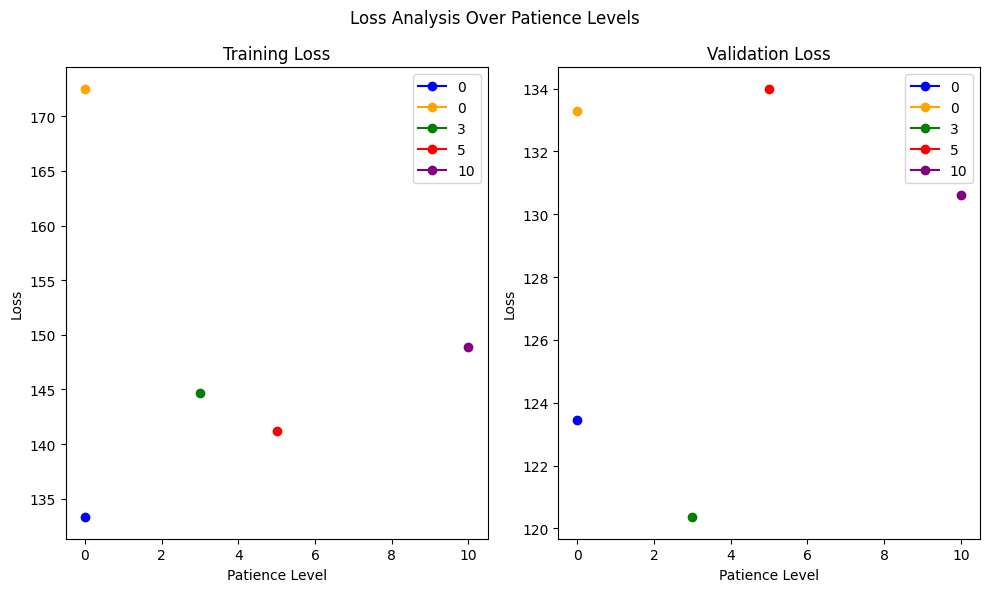

In [40]:
# Plot the training and validation losses across patience levels
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

patienceLevelColors = ['blue', 'orange', 'green', 'red', 'purple']
for patienceLevel, color in zip(earlyStoppingPatienceAnalysis_patienceLevels, patienceLevelColors):
  resultData = earlyStoppingPatienceAnalysis_Results[f'{patienceLevel}']
  trainingLossAverage = resultData.get('trainingLossAverage')
  validationLossAverage = resultData.get('validationLossAverage')
  patienceLevel = 0 if patienceLevel is None else patienceLevel
  ax1.plot(patienceLevel, trainingLossAverage, marker='o', color=color, label=patienceLevel)
  ax2.plot(patienceLevel, validationLossAverage, marker='o', color=color, label=patienceLevel)

fig.suptitle(f"Loss Analysis Over Patience Levels")
ax1.set_title(f"Training Loss")
ax2.set_title(f"Validation Loss")
ax1.set_xlabel(f"Patience Level")
ax2.set_xlabel(f"Patience Level")
ax1.set_ylabel(f"Loss")
ax2.set_ylabel(f"Loss")
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()